In [1]:
pip install tweepy textblob wordcloud matplotlib nltk gensim


In [2]:
import tweepy

# Twitter API credentials (replace with your keys)
consumer_key = 'VhsMk2h4cxmc5BWzk9s35MrI2'
consumer_secret = 'unGoTDERgzHBQatAMTnSFByfG9xOsWfQX3d5gq8KcbrWQqgM9u'
access_token = '1268488594043199491-yfuBoehQQ6z4mcSYADKRDmwsJAJy4Z'
access_token_secret = 'PRR2C5P6PdkQ4VHhWvH1rSkQYGteyFivlCeQyfOdZMy6K'

# Tweepy authentication
auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Collect tweets related to a medication or medical condition (e.g., 'vaccine')
query = 'vaccine OR #vaccine'
tweets = tweepy.Cursor(api.search_tweets, q=query, lang='en', tweet_mode='extended').items(100)

# Store tweets in a list
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet.full_text)

print(f"Collected {len(tweet_list)} tweets.")


Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [3]:
import tweepy

# Twitter API v2 credentials (replace with your keys)
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAFH6wAEAAAAASYRUpdMXegFYsqItLXM5n6H1TWQ%3DqmQ0rCSBCfDZaJFUjqdYmjipyLy2mMGKEIhPQdfoKuml9Y3fhS'

# Initialize client
client = tweepy.Client(bearer_token=bearer_token)

# Search for recent tweets using API v2
query = 'vaccine OR #vaccine'
response = client.search_recent_tweets(query=query, max_results=10, tweet_fields=['text'])

# Store tweets in a list
tweet_list = []
for tweet in response.data:
    tweet_list.append(tweet.text)

print(f"Collected {len(tweet_list)} tweets.")


Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    # Remove URLs, mentions, hashtags, and special characters
    tweet = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+", '', tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    # Lowercase and remove stop words
    tweet = tweet.lower().split()
    tweet = [word for word in tweet if word not in stop_words]
    return ' '.join(tweet)

# Apply cleaning to all tweets
cleaned_tweets = [clean_tweet(tweet) for tweet in tweet_list]
print(cleaned_tweets[:5])


In [ ]:
from textblob import TextBlob

def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Classify sentiment polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Perform sentiment analysis on all cleaned tweets
sentiments = [get_sentiment(tweet) for tweet in cleaned_tweets]

# Check sentiment distribution
from collections import Counter
print(Counter(sentiments))


In [ ]:
from gensim import corpora
from gensim.models import LdaModel
import nltk
nltk.download('punkt')

# Tokenize tweets into words
tokenized_tweets = [nltk.word_tokenize(tweet) for tweet in cleaned_tweets]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_tweets)
corpus = [dictionary.doc2bow(text) for text in tokenized_tweets]

# Build LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Print topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx+1}: {topic}")


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join cleaned tweets into a single text
all_words = ' '.join([text for text in cleaned_tweets])

# Create the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with tweet data and sentiments
df = pd.DataFrame({
    'tweet': cleaned_tweets,
    'sentiment': sentiments
})

# Plot the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], title="Sentiment Distribution")
plt.show()


# REDDIT API

In [7]:
pip install praw pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 5.9 MB/s eta 0:00:00


In [9]:
import praw

# Reddit API credentials
reddit = praw.Reddit(
    client_id='uVfKPnT07F5YYaeZTAj7wA',          # From the top, the string next to your app name
    client_secret='W_Ul_HvPBunIDs7RM-fdaGLWqmskPA',  # The 'secret' field in your app
    user_agent='Ayush_AIML'                     # A name for your app; you can use the name of the app you created.
   # username='YOUR_USERNAME',  # Optional, for logging in if required
   # password='YOUR_PASSWORD'   # Optional, for logging in if required
)

# Test connection
print(reddit.read_only)  # It should print True if your credentials are correct.


True


In [13]:
import pandas as pd

# Function to search and scrape data
def scrape_medical_reviews(subreddit_name, keyword, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(keyword, limit=limit)

    post_data = []

    for post in posts:
        post_info = {
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'num_comments': post.num_comments,
            'body': post.selftext,
            'created_utc': post.created_utc,
        }
        post_data.append(post_info)

    return pd.DataFrame(post_data)

# Example: Scrape 100 posts related to "antibiotics" from r/medicine
df_reviews = scrape_medical_reviews('medicine', 'review', limit=100)

# Preview scraped data
df_reviews.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,title,score,id,url,num_comments,body,created_utc
0,After spending 30 minutes on the phone today t...,2578,126q7w8,https://www.reddit.com/r/medicine/comments/126...,313,Happy Doctor’s Day to everyone except the doct...,1.680190e+09
1,Who reviews all of the data entry that nurses ...,336,1dm0cqm,https://www.reddit.com/r/medicine/comments/1dm...,199,The sheer amount of charting and data entry th...,1.719076e+09
2,A Doctor at Cigna Said Her Bosses Pressured He...,538,1cht0ev,https://www.propublica.org/article/cigna-medic...,71,,1.714587e+09
3,Review paper suggesting psychological pathophy...,406,10khj8z,https://fg.bmj.com/content/14/1/68,212,,1.674598e+09
4,"Vanderbilt nurse's error killed patient, hospi...",712,a2ryh3,https://fox17.com/news/local/vanderbilt-nurses...,508,,1.543865e+09


In [4]:
pip install textblob


In [14]:
from textblob import TextBlob

# Sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1 (negative to positive sentiment)

# Apply sentiment analysis to the review texts
df_reviews['sentiment'] = df_reviews['body'].apply(lambda x: analyze_sentiment(x))

# Display the posts with sentiment score
df_reviews[['title', 'body', 'sentiment']].head()


,title,body,sentiment
0,After spending 30 minutes on the phone today t...,Happy Doctor’s Day to everyone except the doct...,0.2000
1,Who reviews all of the data entry that nurses ...,The sheer amount of charting and data entry th...,0.0125
2,A Doctor at Cigna Said Her Bosses Pressured He...,,0.0000
3,Review paper suggesting psychological pathophy...,,0.0000
4,"Vanderbilt nurse's error killed patient, hospi...",,0.0000


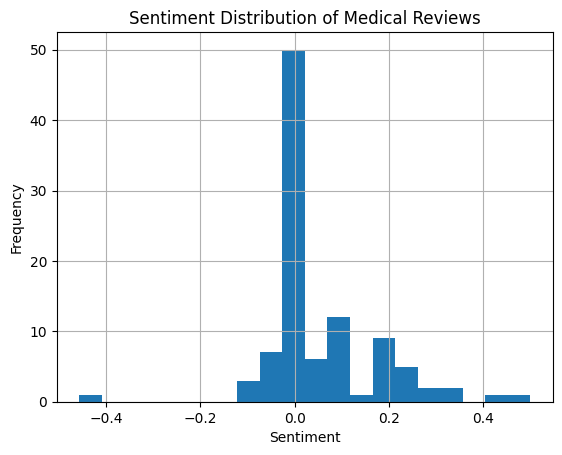

In [15]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
df_reviews['sentiment'].hist(bins=20)
plt.title('Sentiment Distribution of Medical Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()
